In [4]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-28 06:46:11,679: Credentials are already in use. The existing account in the session will be replaced.


In [5]:
q = QuantumRegister(6, 'q')
c = ClassicalRegister(3, 'c')
c_qftadder = QuantumCircuit(q, c)

c_qftadder.h(q[3])
c_qftadder.cp(np.pi / 2, q[4], q[3])
c_qftadder.cp(np.pi / 4, q[5], q[3])
c_qftadder.h(q[4])
c_qftadder.cp(np.pi / 2, q[5], q[4])
c_qftadder.h(q[5])

c_qftadder.cz(q[0], q[5])
c_qftadder.cz(q[1], q[5])
c_qftadder.cz(q[2], q[5])
c_qftadder.cz(q[1], q[4])
c_qftadder.cz(q[2], q[4])
c_qftadder.cz(q[2], q[3])

c_qftadder.barrier(q[3],q[4],q[5])
c_qftadder.h(q[3])
c_qftadder.h(q[4])
c_qftadder.h(q[5])
c_qftadder.barrier(q[3],q[4],q[5])
c_qftadder.h(q[3])
c_qftadder.measure(q[3], c[0])


c_qftadder.p(np.pi/2, q[4]).c_if(c, 1)
c_qftadder.h(q[4])
c_qftadder.measure(q[4], c[1])

c_qftadder.p(np.pi/4, q[5]).c_if(c, 1)
c_qftadder.p(np.pi/2, q[5]).c_if(c, 2)
c_qftadder.p(np.pi / 2 + np.pi / 4, q[5]).c_if(c, 3)
c_qftadder.h(q[5])

c_qftadder.measure(q[5], c[2])

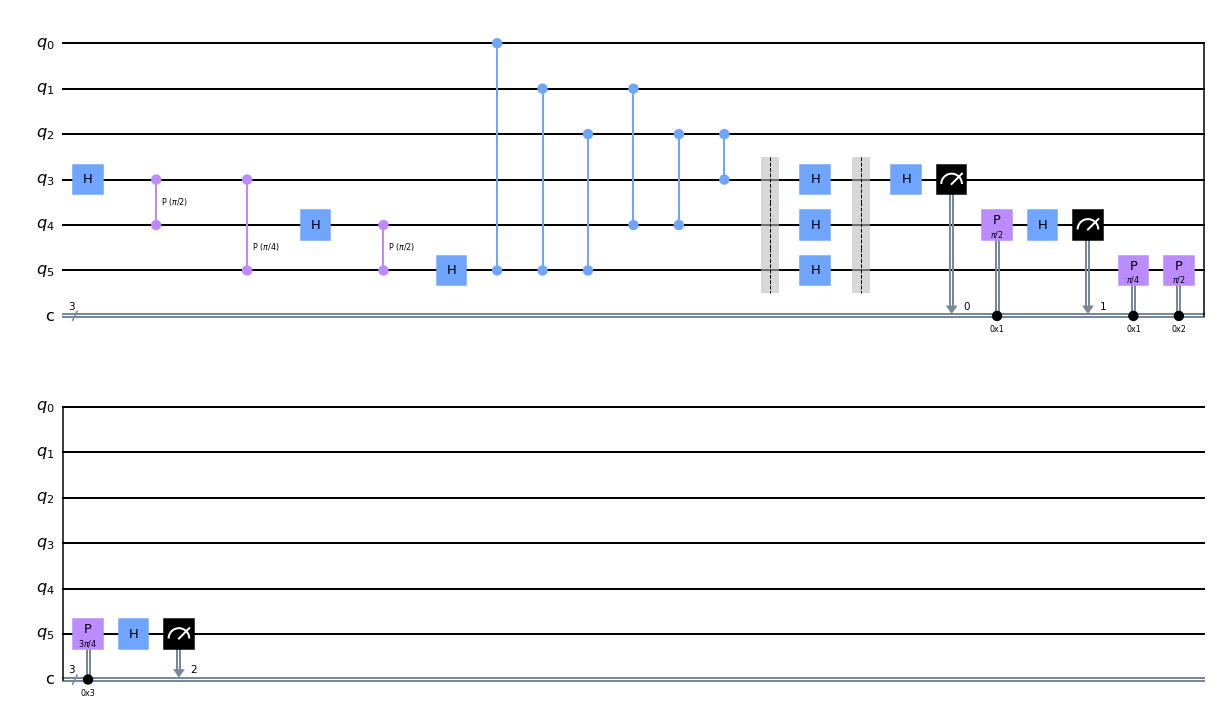

In [6]:
%matplotlib inline
c_qftadder.draw(output='mpl')

In [7]:
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

In [8]:
from qiskit import IBMQ

provider = IBMQ.get_provider(hub='ibm-q-skku', group='korea-university', project='ku-graduate')
backend = provider.get_backend('ibmq_qasm_simulator')


Total count for 00 and 11 are: {'000': 12583, '001': 12388, '010': 12508, '011': 12486, '100': 12533, '101': 12411, '110': 12484, '111': 12607}


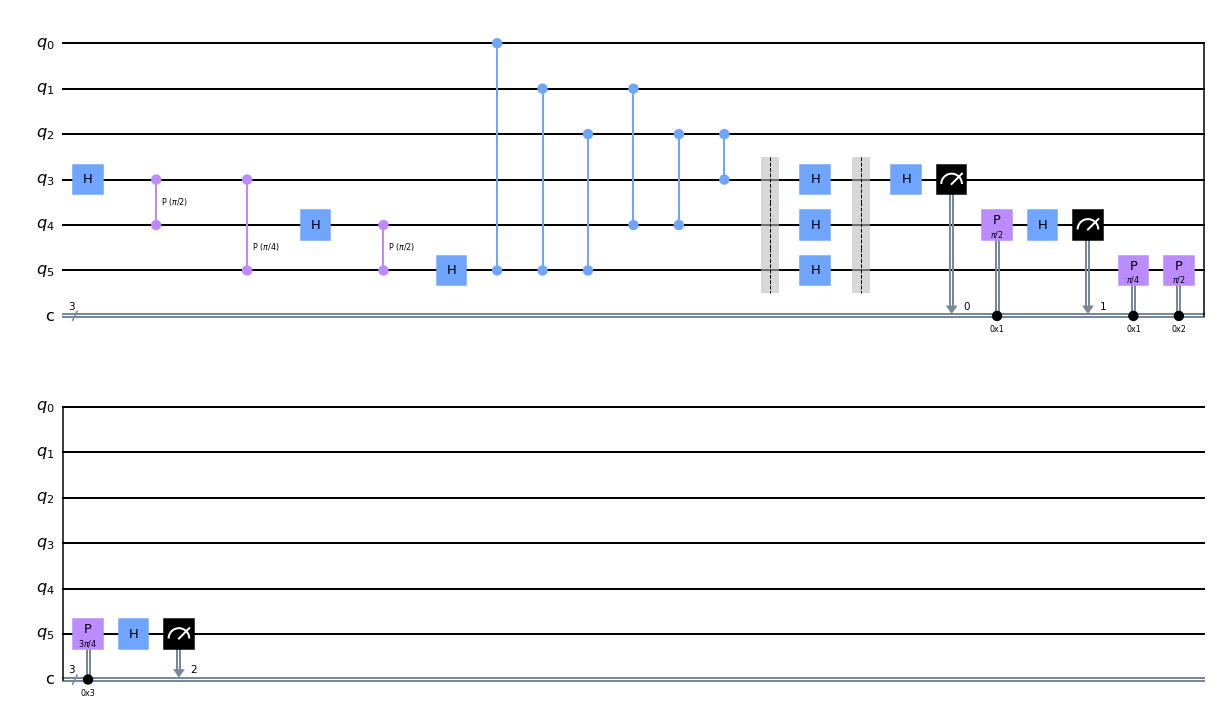

In [10]:
job = execute(c_qftadder, backend, shots=100000)
result = job.result()
counts = result.get_counts(c_qftadder)
print("\nTotal count for 00 and 11 are:",counts)
c_qftadder.draw()

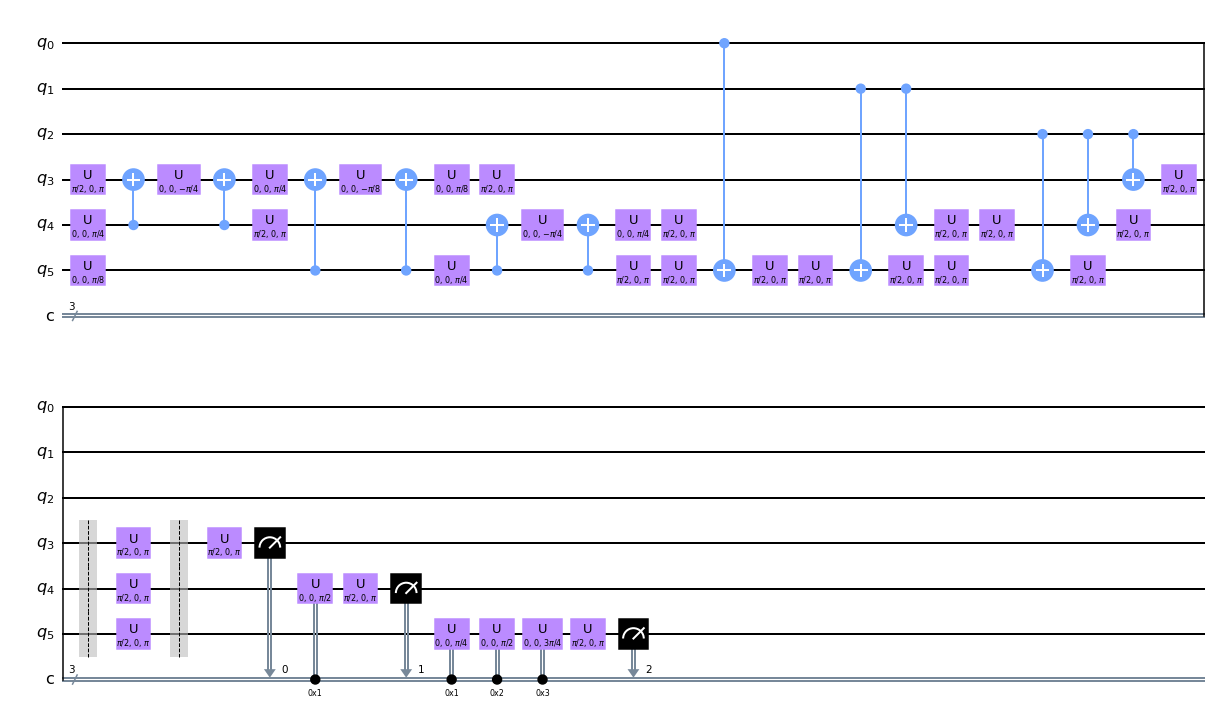

In [12]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(c_qftadder) 
new_circuit.draw(output='mpl')

In [13]:
new_circuit.count_ops()

OrderedDict([('u', 34), ('cx', 12), ('measure', 3), ('barrier', 2)])